Linear Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

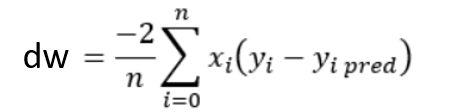

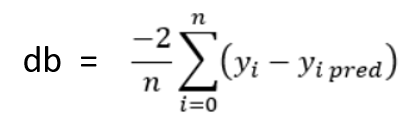

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
file = "salary_data.csv"
df = pd.read_csv(file)
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
df.shape

(30, 2)

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

print(X)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2)

In [7]:
class LinearRegression():
    def __init__(self,lr,epochs):
        self.lr = lr
        self.epochs = epochs
    
    def fit(self,X,y):
        
        # get shape of data (number and features)
        self.num_of_data, self.features = X.shape

        # initialize parameters
        self.w = np.zeros(self.features)
        self.b = 0 
        self.X = X
        self.y = y

        # update weights and bias variables
        for i in range(self.epochs):
            self.update_hyperparam()
    
    def update_hyperparam(self):
        
        # get y_prediction value
        y_prediction = self.prediction(self.X)

        # gradient descent process 
        dw = -2 * ((self.X.T).dot(self.y - y_prediction)) / self.num_of_data
        db = -2 * np.sum(self.y - y_prediction) / self.num_of_data

        self.w = self.w - self.lr*dw 
        self.b = self.b - self.lr*db
        
    def prediction(self, X):
        return X.dot(self.w) + self.b


In [8]:
model = LinearRegression(lr=0.01,epochs=10000)
model.fit(X_train,y_train)

In [9]:
print("weight: ", model.w[0])
print("bias: ", model.b)

weight:  9512.944987627472
bias:  23707.813246574984


In [10]:
test_predictions = model.prediction(X_test)
print(test_predictions)

[ 36074.64173049  34172.05273297  66516.0656909   58905.7097008
  91249.72265873  80785.48317234 101713.96214512  52246.64820946
  42733.70322183  88395.83916244]


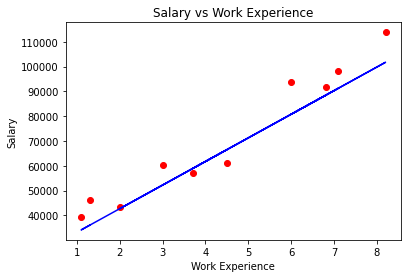

In [11]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, test_predictions, color = "blue")
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Work Experience")
plt.show()
